This notebook is referenced from [Hello World — Programming on Quantum Computers Season 1 Ep 3](https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=3)

In [1]:
# from qiskit import everything
from qiskit import *

%matplotlib inline
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.14.0', 'qiskit-aqua': '0.9.2', 'qiskit': '0.27.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
qr = QuantumRegister(2)

In [3]:
cr = ClassicalRegister(2)

In [4]:
circuit = QuantumCircuit(qr, cr)

In [5]:
circuit.draw(output="text")

q0_0: 
      
q0_1: 
      
c0: 2/

Apply `Hadamard gate` to the first qubit
$$
H={\frac {1}{\sqrt {2}}}{\begin{bmatrix}1&1\\1&-1\end{bmatrix}}
$$

In [6]:
circuit.h(qr[0])

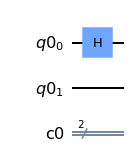

In [7]:
_ = circuit.draw(output="mpl")

Apply `Controlled NOT (or CNOT or CX or controlled Pauli-X) gate` to 2 qubits. Fisrt qubit is control qubit and second qubit is the target qubit
$$
{\mbox{CNOT}}={\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}}
$$

In [8]:
circuit.cx(qr[0], qr[1])

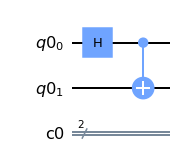

In [9]:
_ = circuit.draw()

In [10]:
# Measure quantum bit into classical bit (tuples).
circuit.measure(qr, cr)

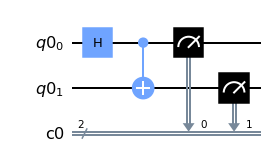

In [11]:
_ = circuit.draw()

In [12]:
# Return a list of backends matching the specified filtering.
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [13]:
simulator = Aer.get_backend("qasm_simulator")  # retrun an instance of QasmSimulator (Noisy quantum circuit simulator backend)

In [14]:
type(simulator)

qiskit.providers.aer.backends.qasm_simulator.QasmSimulator

In [15]:
# Execute a list of :class:`qiskit.circuit.QuantumCircuit` or :class:`qiskit.pulse.Schedule` on a backend.
result = execute(circuit, backend=simulator).result()

In [16]:
result.to_dict()

{'backend_name': 'qasm_simulator',
 'backend_version': '0.8.2',
 'qobj_id': '026e28c0-0cee-4ba3-bb2a-5cc90e11e1df',
 'job_id': '4d37e9ab-2425-4760-9f25-fa9e9b78cb36',
 'success': True,
 'results': [{'shots': 1024,
   'success': True,
   'data': {'counts': {'0x0': 509, '0x3': 515}},
   'meas_level': <MeasLevel.CLASSIFIED: 2>,
   'header': {'clbit_labels': [['c0', 0], ['c0', 1]],
    'creg_sizes': [['c0', 2]],
    'global_phase': 0.0,
    'memory_slots': 2,
    'metadata': None,
    'n_qubits': 2,
    'name': 'circuit-9',
    'qreg_sizes': [['q0', 2]],
    'qubit_labels': [['q0', 0], ['q0', 1]]},
   'status': 'DONE',
   'seed_simulator': 3965648133,
   'metadata': {'method': 'stabilizer',
    'measure_sampling': True,
    'parallel_state_update': 16,
    'parallel_shots': 1,
    'fusion': {'enabled': False}},
   'time_taken': 0.0074569}],
 'date': '2021-07-09T10:02:44.136051',
 'status': 'COMPLETED',
 'header': {'backend_name': 'qasm_simulator', 'backend_version': '0.8.2'},
 'metadata': 

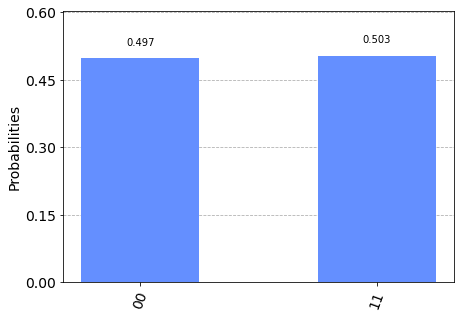

In [17]:
from qiskit.tools.visualization import plot_histogram
_ = plot_histogram(result.get_counts(circuit))

In [18]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider("ibm-q")

In [20]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [21]:
from qiskit.tools.monitor import backend_overview
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 121            Pending Jobs: 9              Pending Jobs: 2
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      129.7          Avg. T1:      66.2           Avg. T1:      79.2
Avg. T2:      61.0           Avg. T2:      94.4           Avg. T2:      92.4



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 34             Pending Jobs: 41             Pending Jobs: 366
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           O

In [22]:
qcomp = provider.get_backend("ibmq_bogota")

In [23]:
job = execute(circuit, backend=qcomp)

In [24]:
from qiskit.tools.monitor import job_monitor

In [25]:
job_monitor(job)

Job Status: job has successfully run


In [26]:
result = job.result()

real quantum device is susceptible to small quantum errors

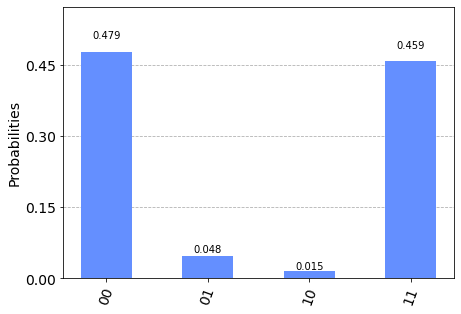

In [27]:
_ = plot_histogram(result.get_counts(circuit))